#### Import Libraries and Data

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Firdose Anjum\\OneDrive\\Desktop\\Tech skills\\ML Projects\\House Price Prediction\\HousingData -with missing values.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### Exploratory Data Analysis (EDA)

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

##### The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollar
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000's dollar

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

##### Correlation heat map

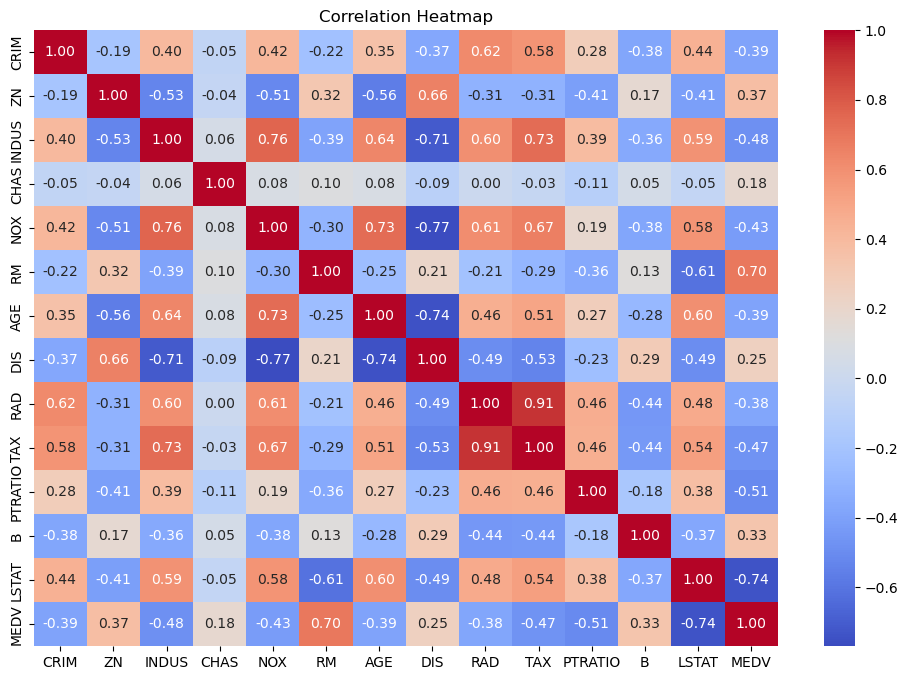

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### Distribution of Features

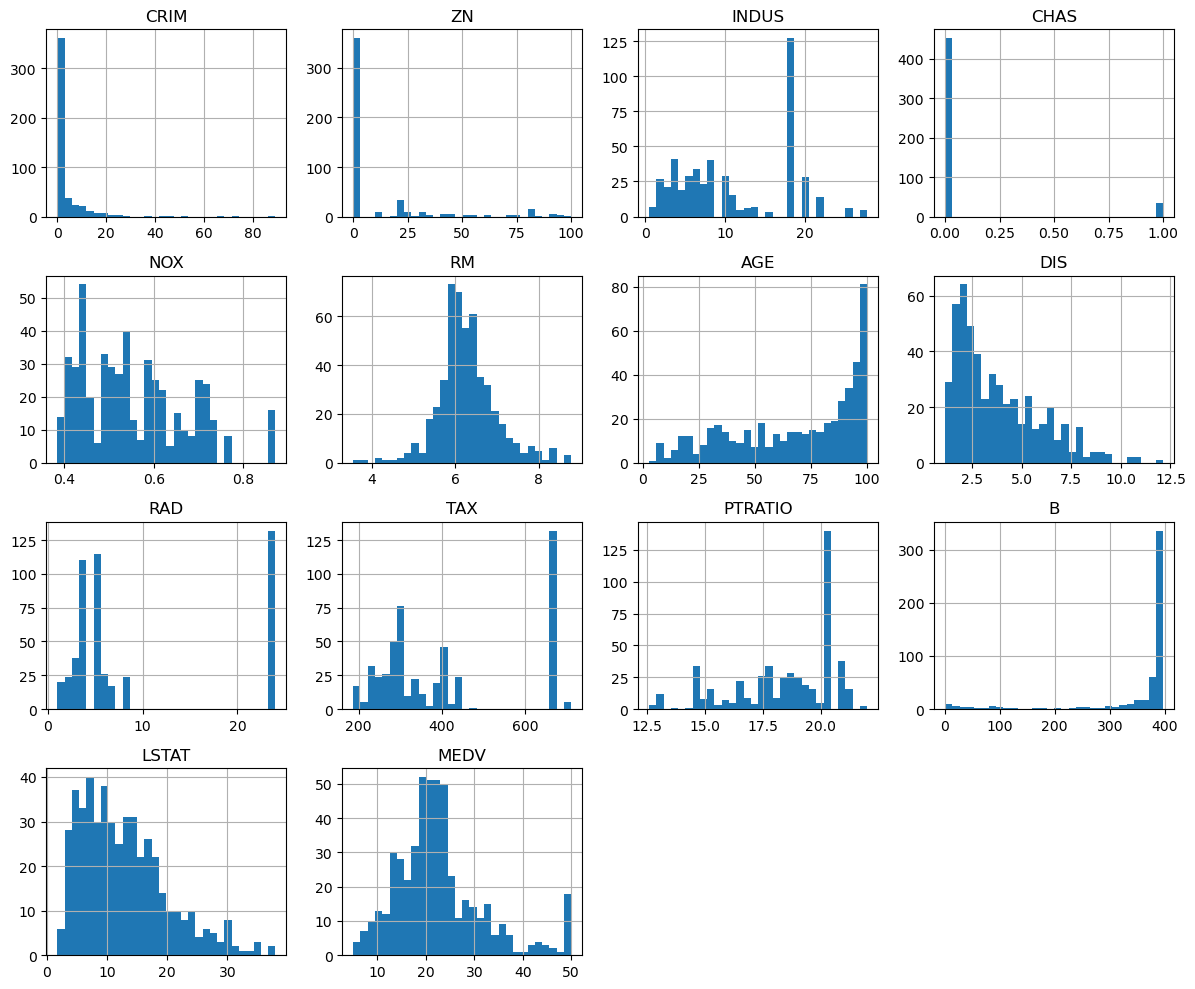

In [14]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

##### Scatter plots of dependent feature v/s independent features

C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_6752\44931014.py:10: UserWarning: The figure layout has changed to tight

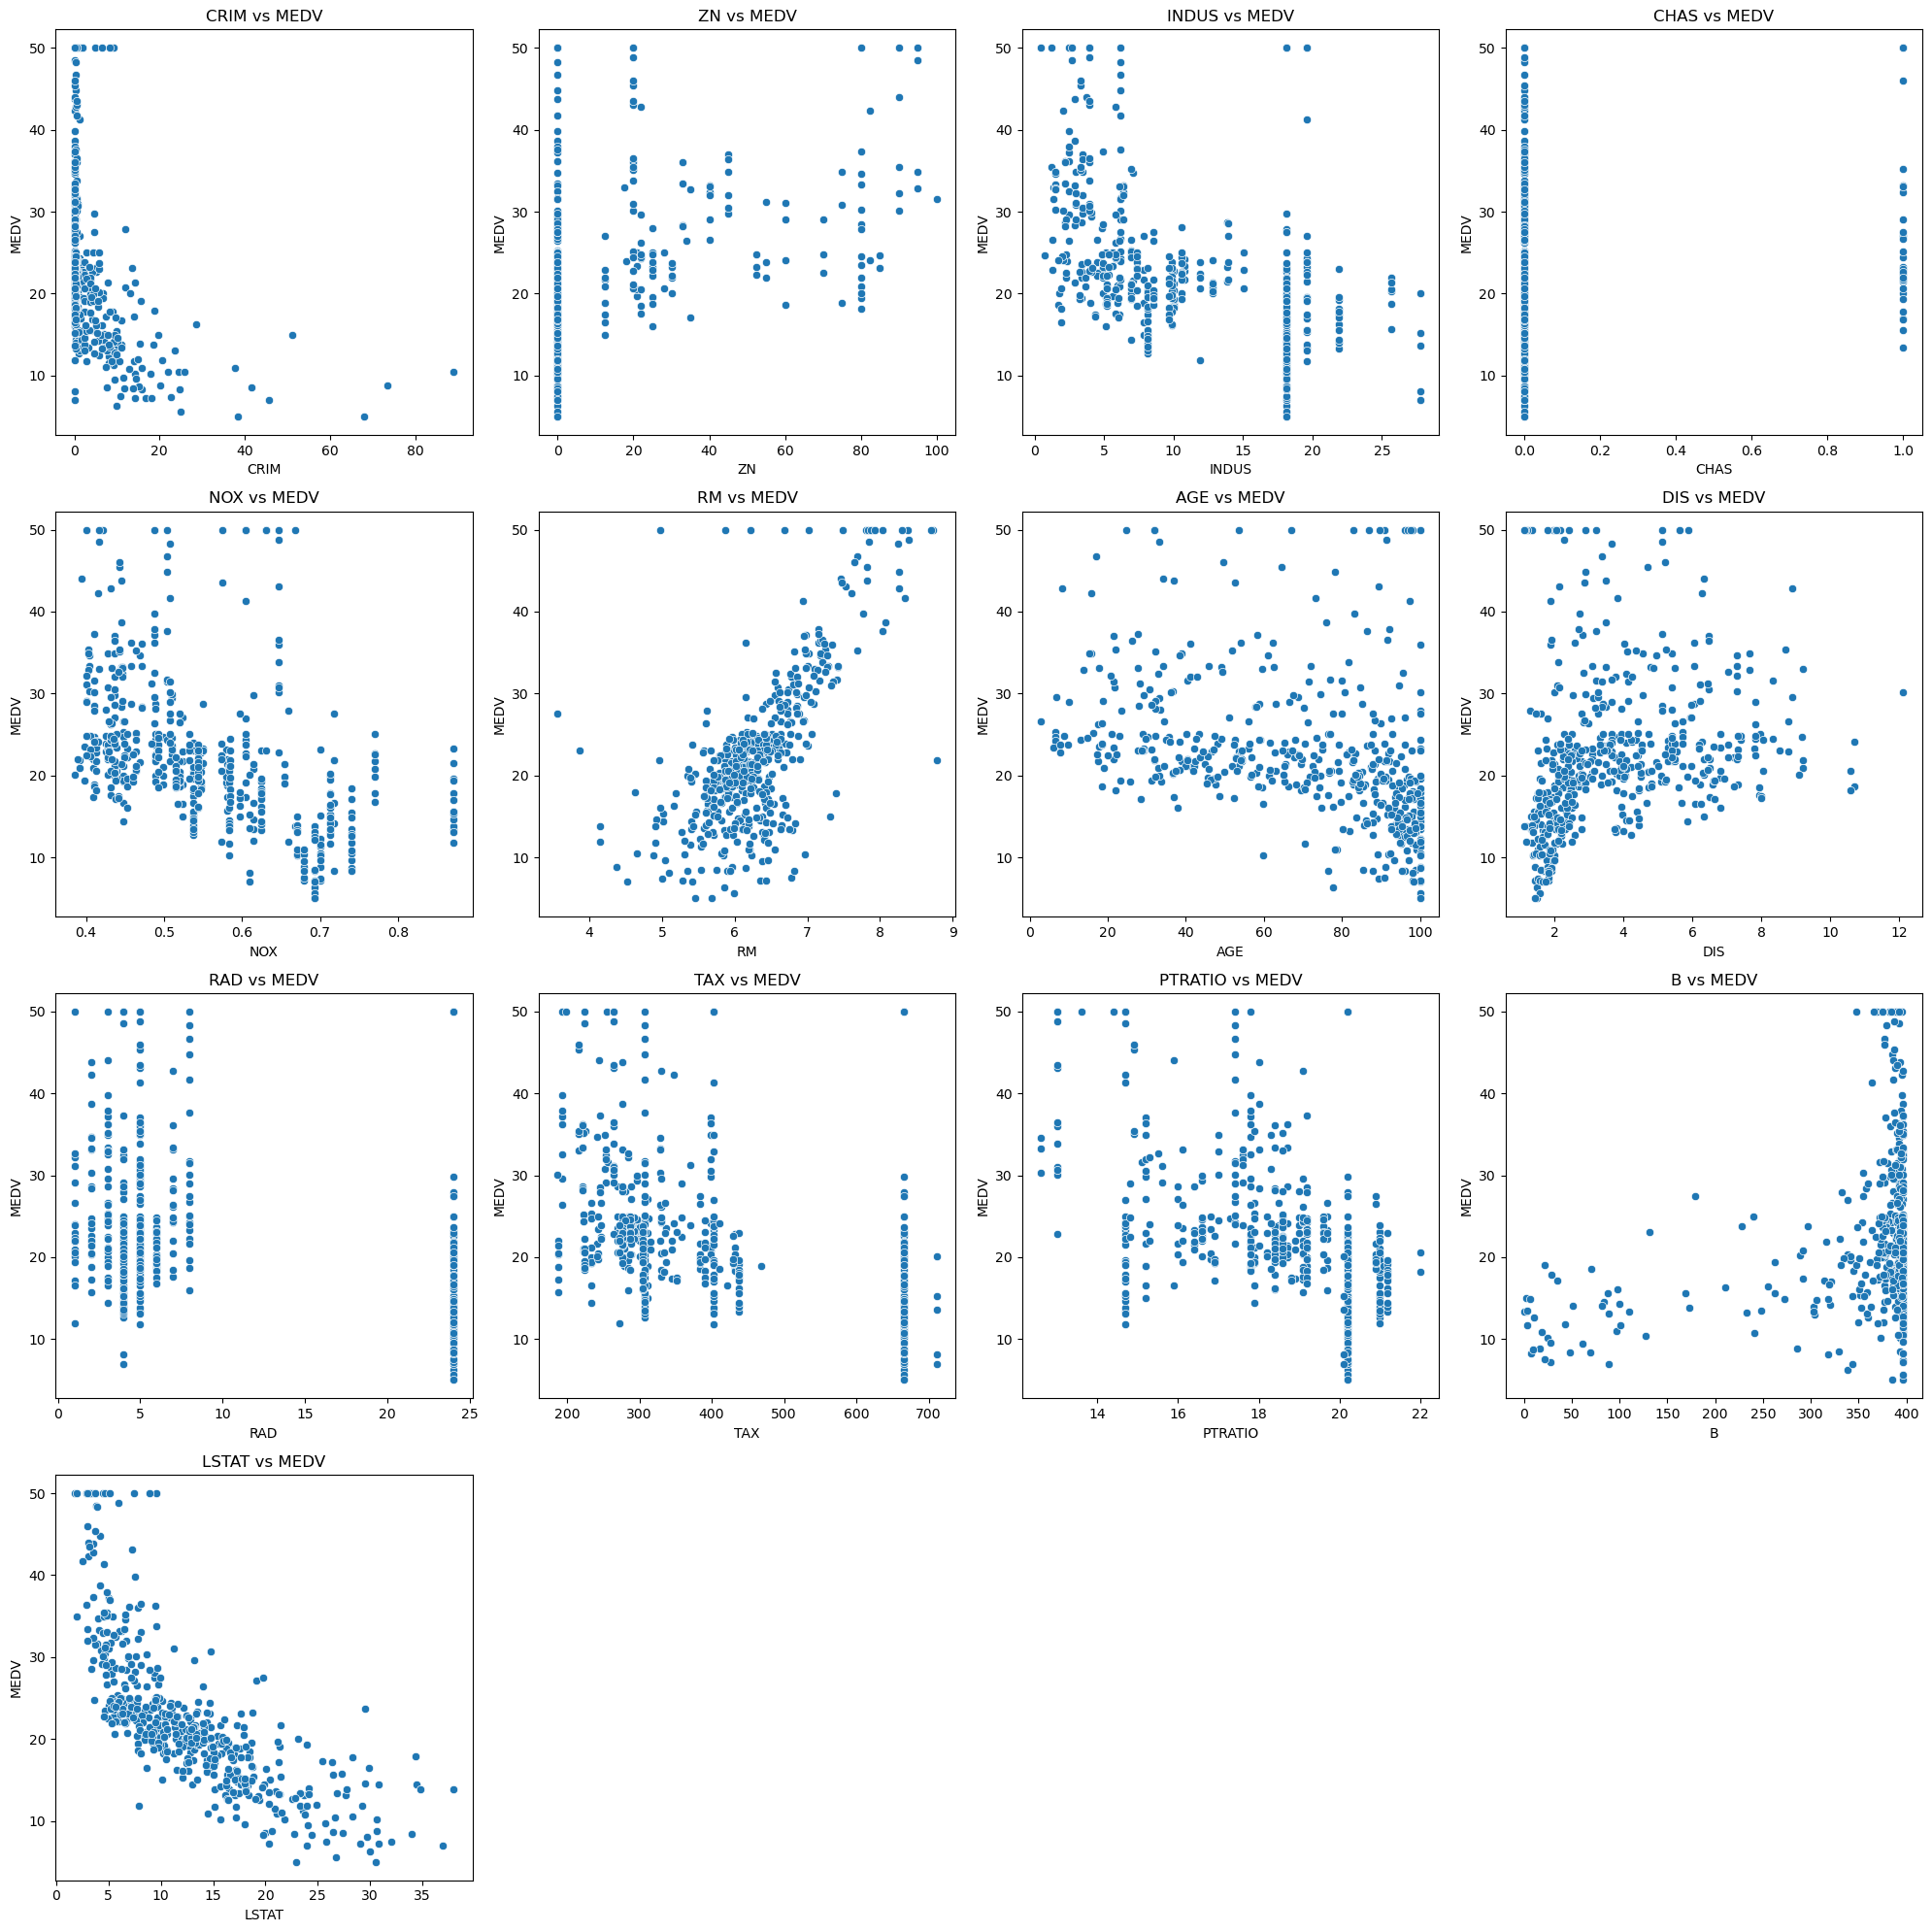

In [15]:
features = df.columns.drop('MEDV')

plt.figure(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(4, 4, i + 1)  
    sns.scatterplot(x=df[col], y=df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'{col} vs MEDV')
    plt.tight_layout()

plt.show()

#### Data Preprocessing

##### 1. Handling missing data

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
df[df.columns] = imputer.fit_transform(df)

##### 2. Separating X and Y

In [17]:
X = df.drop('MEDV', axis = 1)
Y = df['MEDV']

##### 3. Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

##### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [22]:
Y_pred = lr_model.predict(X_test_scaled)

##### Model Evaluation

In [29]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Linear Regression Evaluation Metrics:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Linear Regression Evaluation Metrics:
MAE  = 3.15
MSE  = 25.02
RMSE = 5.00
R²   = 0.66


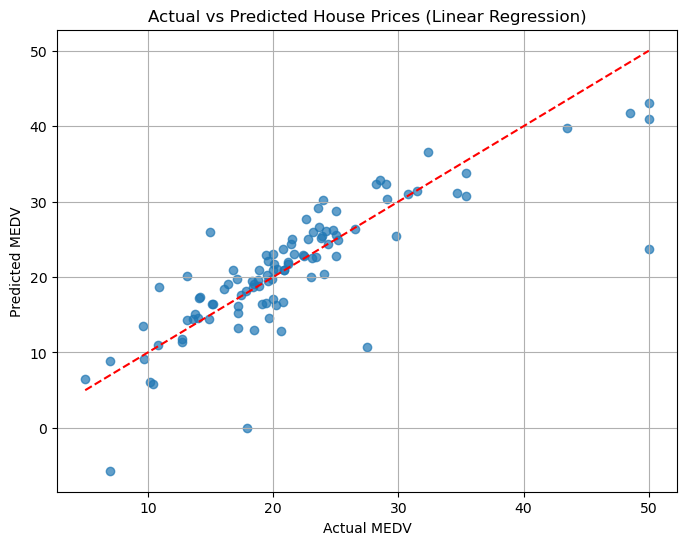

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

##### Feature Importance

In [31]:
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
CRIM,-1.004201
ZN,0.664110
INDUS,-0.181698
CHAS,0.821788
NOX,-1.883002
RM,3.367430
AGE,-0.531696
DIS,-3.238843
RAD,1.911614
TAX,-1.518703


##### Residual Analysis

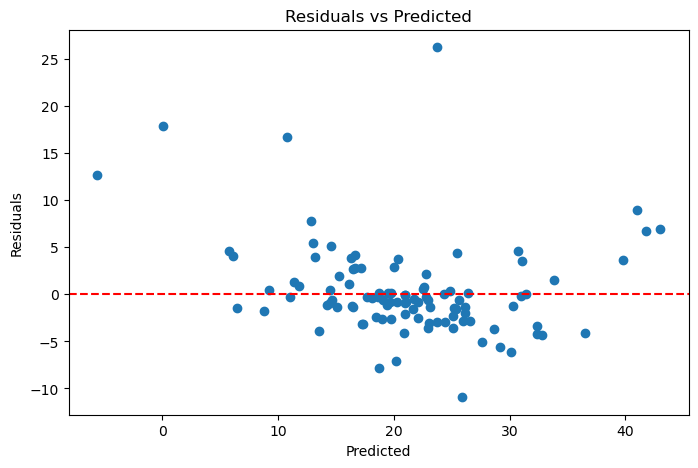

In [32]:
residuals = Y_test - Y_pred
plt.figure(figsize=(8, 5))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

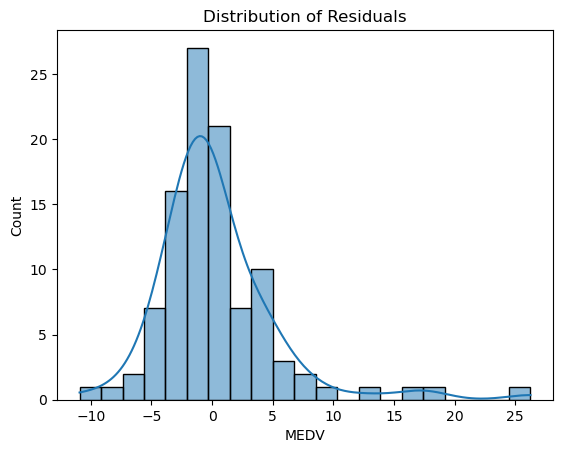

In [33]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

##### Cross-Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X_train_scaled, Y_train,scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

print("Cross-Validated RMSE Scores:", rmse_scores)
print("Mean CV RMSE:", rmse_scores.mean())

Cross-Validated RMSE Scores: [4.15620797 5.96958868 4.97818117 4.83481456 4.76558761]
Mean CV RMSE: 4.940875998457245


### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, Y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [40]:
# Evaluation metrics
mae = mean_absolute_error(Y_test, y_pred_ridge)
mse = mean_squared_error(Y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_ridge)

print("Ridge Regression Evaluation Metrics:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Ridge Regression Evaluation Metrics:
MAE  = 3.15
MSE  = 25.02
RMSE = 5.00
R²   = 0.66


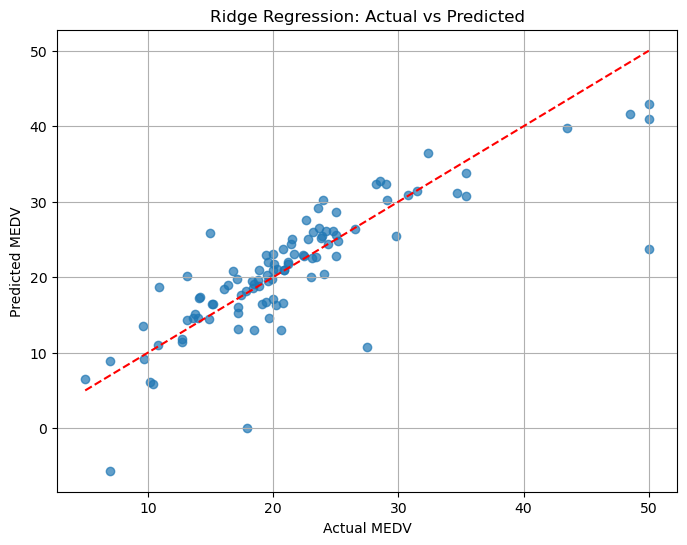

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_ridge, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [42]:
coeff_ridge = pd.DataFrame({
    "Feature": X.columns,
    "Ridge Coef": ridge_model.coef_,
})
coeff_ridge

,Feature,Ridge Coef
0,CRIM,-0.995115
1,ZN,0.648536
2,INDUS,-0.195790
3,CHAS,0.824505
4,NOX,-1.855652
5,RM,3.369657
6,AGE,-0.527830
7,DIS,-3.199845
8,RAD,1.848267
9,TAX,-1.463009


In [44]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, Y_train)

print("Best alpha:", ridge_cv.alpha_)

Best alpha: 10.0


##### Comparison

In [46]:
alphas = np.logspace(-3, 3, 50) 
coefs = []
r2_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, Y_train)
    coefs.append(model.coef_)
    
    y_pred = model.predict(X_test_scaled)
    r2_scores.append(r2_score(Y_test, Y_pred))

coefs = np.array(coefs)

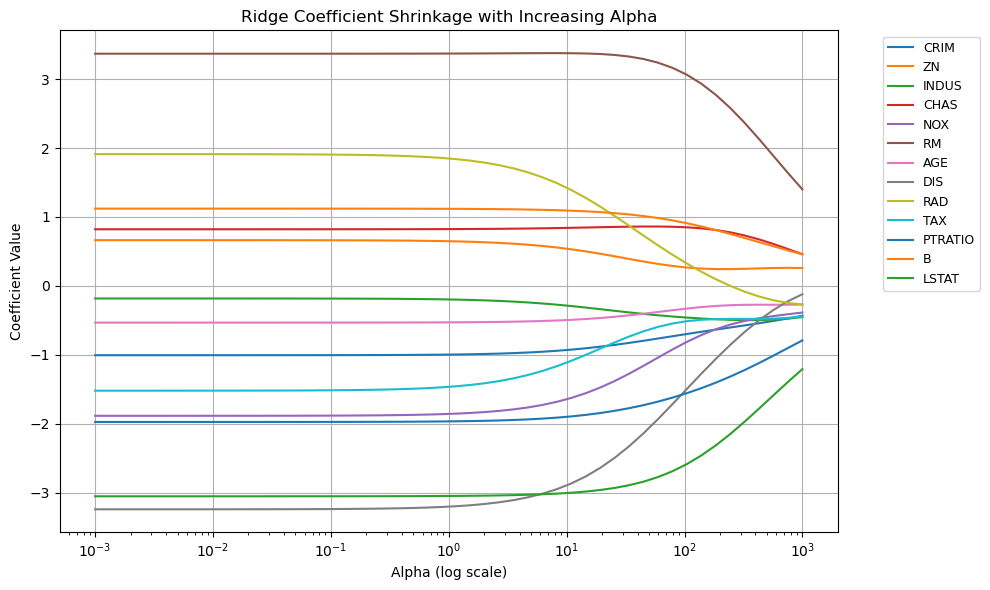

In [47]:
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficient Shrinkage with Increasing Alpha")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

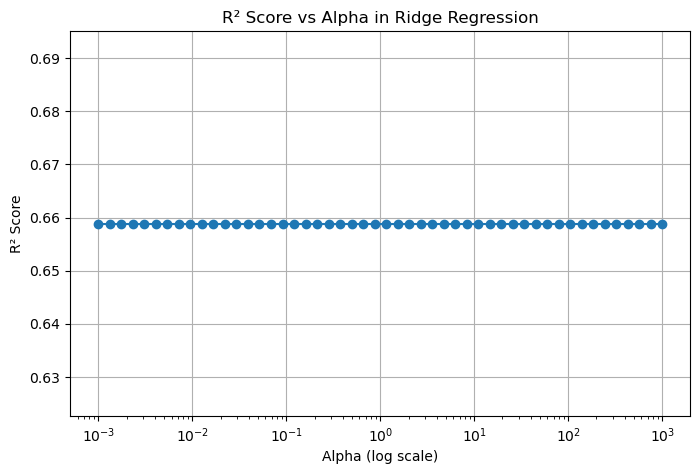

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("R² Score vs Alpha in Ridge Regression")
plt.grid(True)
plt.show()

* Ridge regularization penalizes large coefficients — but if your features are already:
1. Properly scaled using StandardScaler
2. Not highly correlated (i.e., no multicollinearity)
* Then Ridge has little regularization work to do, and changes in alpha won’t impact model performance much.

### Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, Y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [50]:
mae = mean_absolute_error(Y_test, y_pred_lasso)
mse = mean_squared_error(Y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_lasso)

print("Lasso Regression Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Lasso Regression Evaluation:
MAE  = 3.47
MSE  = 27.92
RMSE = 5.28
R²   = 0.62


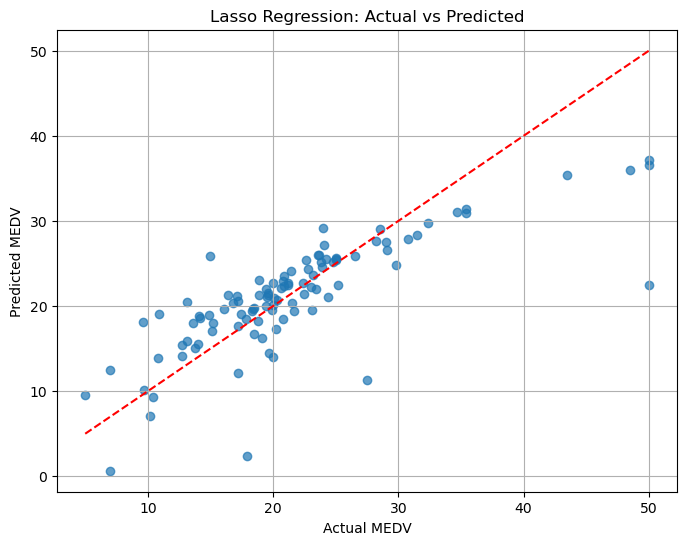

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_lasso, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [52]:
coeff_lasso = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Coefficient": lasso_model.coef_
})
coeff_lasso

,Feature,Lasso Coefficient
0,CRIM,-0.122238
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.090266
4,NOX,-0.000000
5,RM,3.283919
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,-0.000000
9,TAX,-0.000000


In [53]:
alphas = np.logspace(-3, 1, 50) 
coefs = []
r2_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)
    y_pred = lasso.predict(X_test_scaled)
    r2_scores.append(r2_score(Y_test, y_pred))

coefs = np.array(coefs)

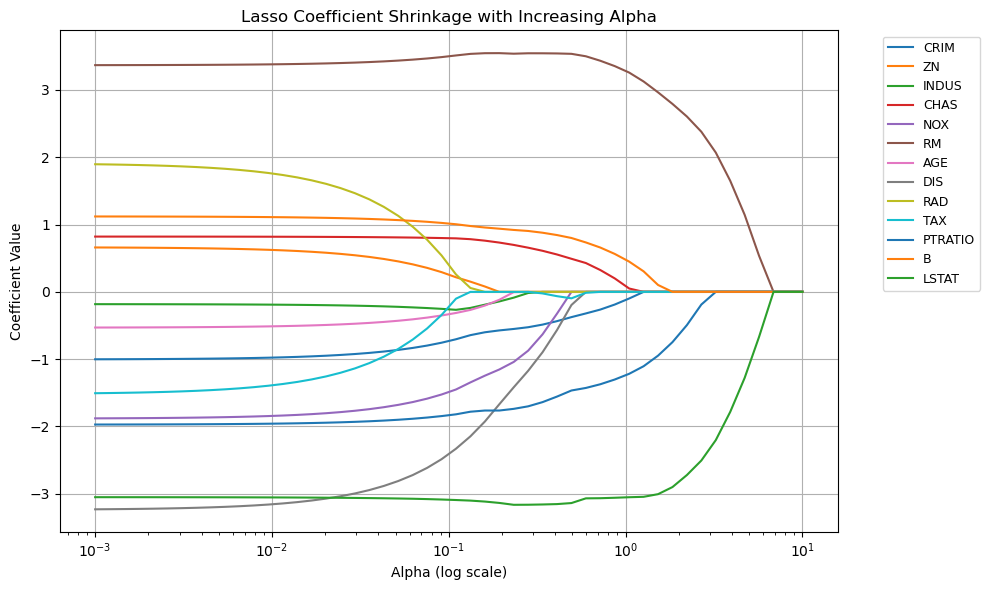

In [54]:
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=X.columns[i])

plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficient Shrinkage with Increasing Alpha")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

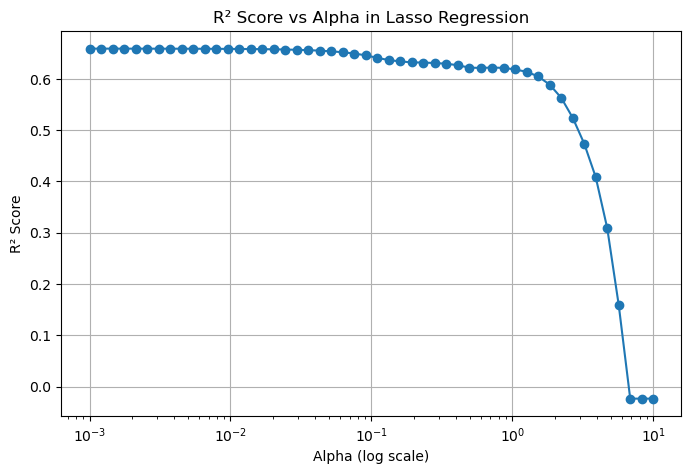

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("R² Score vs Alpha in Lasso Regression")
plt.grid(True)
plt.show()

In [57]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, Y_train)
print("Best alpha found:", lasso_cv.alpha_)

Best alpha found: 0.001


### Comparison of all 3

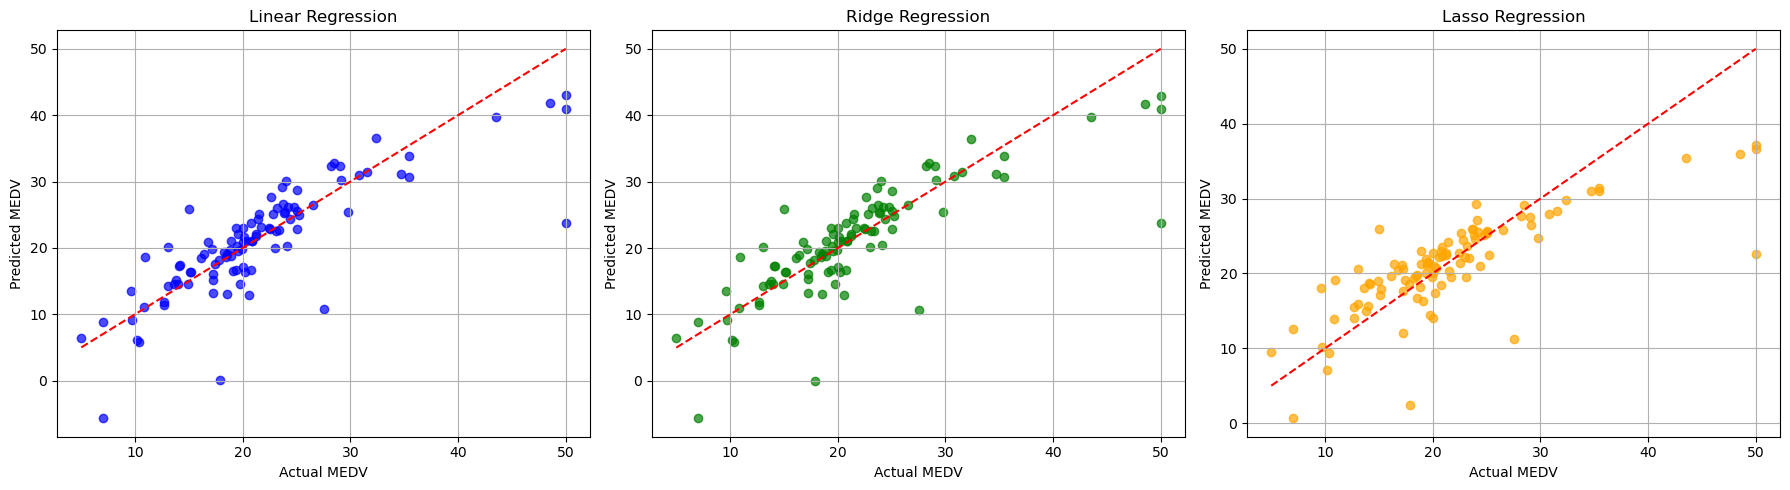

In [59]:
plt.figure(figsize=(18, 5))

# --- Linear Regression ---
plt.subplot(1, 3, 1)
plt.scatter(Y_test, Y_pred, alpha=0.7, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)

# --- Ridge Regression ---
plt.subplot(1, 3, 2)
plt.scatter(Y_test, y_pred_ridge, alpha=0.7, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Ridge Regression")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)

# --- Lasso Regression ---
plt.subplot(1, 3, 3)
plt.scatter(Y_test, y_pred_lasso, alpha=0.7, color='orange')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Lasso Regression")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)

plt.tight_layout()
plt.show()

In [60]:
res_lin = Y_test - y_pred
res_ridge = Y_test - y_pred_ridge
res_lasso = Y_test - y_pred_lasso

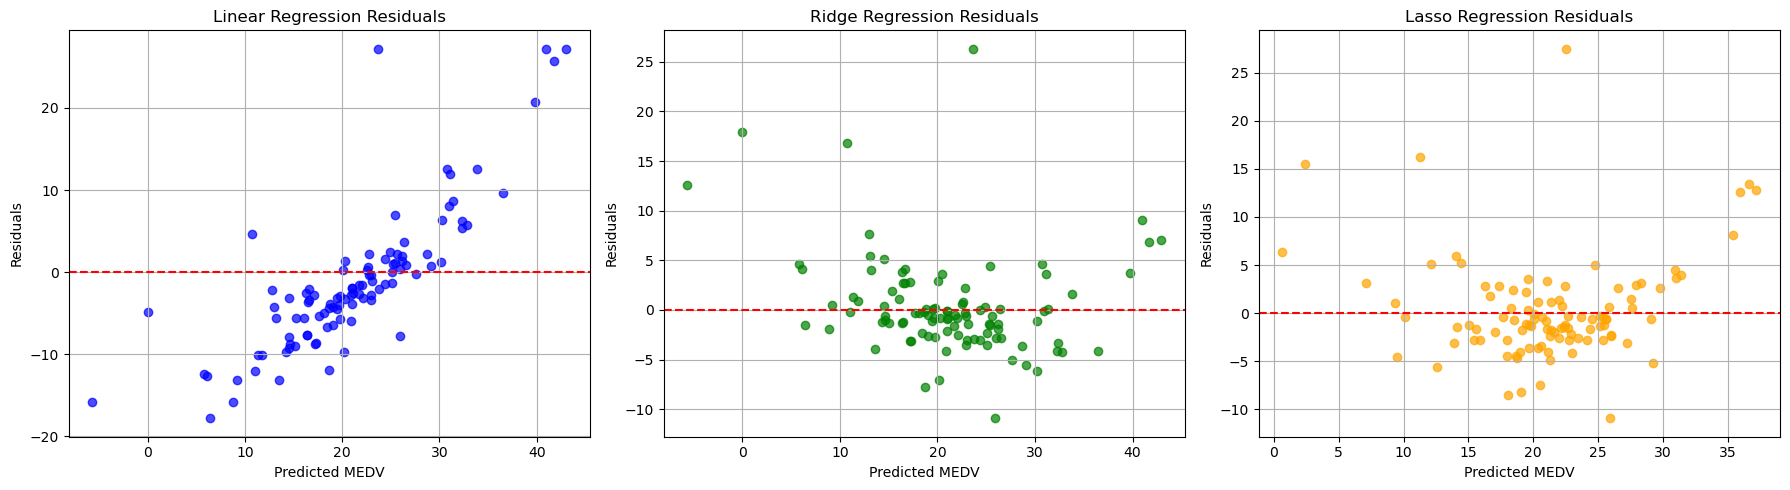

In [61]:
plt.figure(figsize=(18, 5))

# --- Linear Regression Residuals ---
plt.subplot(1, 3, 1)
plt.scatter(Y_pred, res_lin, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linear Regression Residuals")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.grid(True)

# --- Ridge Regression Residuals ---
plt.subplot(1, 3, 2)
plt.scatter(y_pred_ridge, res_ridge, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Ridge Regression Residuals")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.grid(True)

# --- Lasso Regression Residuals ---
plt.subplot(1, 3, 3)
plt.scatter(y_pred_lasso, res_lasso, alpha=0.7, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Lasso Regression Residuals")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.grid(True)

plt.tight_layout()
plt.show()